# Phase 2

## Problem Definition

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.

Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years.

## Dataset

#### Give Me Some Credit

In this Model, credit scoring data sets from Kaggle 
called ‘Give me some credit’ is used to build classifiers. To evaluate
the classification performance of credit scoring model.

 We will use the training dataset (cs-training.csv file) which will be used for models training and test data (cs-test.csv file) .

## Prepare Data

In this part, the data and variables is done. Target ratio, variables
values distributions are also be investigated. Null value analysis is done and null values in
variables, filled with statistical approach to prevent them to influence modelling in a bad
way.


After the describing inputs, missing values are also investigated, and for 2 inputs
(‘MonthlyIncome’ , ‘NumberOfDependents’) some missing values are observed. Handling
with missing values is very important to create accurate models, 


#### The variables in the following data set:
| Variable Name              | Description                                                                                                                                              | Type       |
| :- |-------------: | :-:
| SeriousDlqin2yrs                     | Person experienced 90 days past due delinquency or worse                                                                                                 | Y/N        |
| RevolvingUtilizationOfUnsecuredLines | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits | percentage |
| age                                  | Age of borrower in years                                                                                                                                 | integer    |
| NumberOfTime30-59DaysPastDueNotWorse | Number of times borrower has been 30-59 days past due but no worse in the last 2 years.                                                                  | integer    |
| DebtRatio                            | Monthly debt payments, alimony,living costs divided by monthy gross income                                                                               | percentage |
| MonthlyIncome                        | Monthly income                                                                                                                                           | real       |
| NumberOfOpenCreditLinesAndLoans      | Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)                                                     | integer    |
| NumberOfTimes90DaysLate              | Number of times borrower has been 90 days or more past due.                                                                                              | integer    |
| NumberRealEstateLoansOrLines         | Number of mortgage and real estate loans including home equity lines of credit                                                                           | integer    |
| NumberOfTime60-89DaysPastDueNotWorse | Number of times borrower has been 60-89 days past due but no worse in the last 2 years.                                                                  | integer    |
| NumberOfDependents                   | Number of dependents in family excluding themselves (spouse, children etc.)                                                                              | integer    |



## Python packages

### NumPy
NumPy is a well known general-purpose array-processing package. An extensive collection of high complexity mathematical functions make NumPy powerful to process large multi-dimensional arrays and matrices. NumPy is very useful for handling linear algebra, Fourier transforms, and random numbers.
### Scikit-learn
The Python library, Scikit-Learn, is built on top of the matplotlib, NumPy, and SciPy libraries. This Python ML library has several tools for data analysis and data mining tasks.

### Pandas
Pandas is a popular Python library for data analysis. It is not directly related to Machine Learning. As we know that the dataset must be prepared before training. In this case, Pandas comes handy as it was developed specifically for data extraction and preparation.
### Matplotlib
Matplotlib is a very popular Python library for data visualization. Like Pandas, it is not directly related to Machine Learning. It particularly comes in handy when a programmer wants to visualize the patterns in the data. It is a 2D plotting library used for creating 2D graphs and plots.
### seaborn

Seaborn is a library for making statistical graphs in Python. It is built on top of matplotlib and also integrated with pandas data structures.
### Scikit-plot
Scikit-plot is the result of an unartistic data scientist’s dreadful realization that visualization is one of the most crucial components in the data science process, not just a mere afterthought.

## Importing Libraries

In [5]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scikitplot as skplt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix, roc_curve, auc,classification_report, recall_score
# from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.metrics import recall_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## data analysis

In [6]:
train_data = pd.read_csv("cs-training.csv")
test_data = pd.read_csv("cs-test.csv")

### review data

In [7]:
print(train_data.describe)
print(train_data.head)

<bound method NDFrame.describe of         Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
0                1                 1                              0.766127   
1                2                 0                              0.957151   
2                3                 0                              0.658180   
3                4                 0                              0.233810   
4                5                 0                              0.907239   
...            ...               ...                                   ...   
149995      149996                 0                              0.040674   
149996      149997                 0                              0.299745   
149997      149998                 0                              0.246044   
149998      149999                 0                              0.000000   
149999      150000                 0                              0.850283   

        age  NumberOfTime30-5

In [8]:
train_data.shape


(150000, 12)

### print columns headers of the dataset

In [9]:
train_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

### drop lines with missing data

In [10]:
train_data.dropna(axis=1)
cols_with_missing = [col for col in train_data.columns
                         if train_data[col].isnull().any()]
reduced_train_data = train_data.drop(cols_with_missing, axis=1)
reduced_test_data = test_data.drop(cols_with_missing,axis=1)

In [11]:
reduced_train_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')

## Applying Machine Learning Algorithms for Classification Problem

## logistic-regression

 Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

### specify the target variable

In [12]:
train_y = reduced_train_data.SeriousDlqin2yrs
test_y = reduced_test_data.SeriousDlqin2yrs

### create list of features

In [13]:
feature_names = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse']
#create data corresponding to the features
train_X = reduced_train_data[feature_names]
test_X = reduced_test_data[feature_names]

### Spiliting Dataset into train and test set.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.3, random_state = 0)

In [15]:
#specify the model, set any numeric valye as parameter to ensure reproducibility 
credit_model = LogisticRegression(random_state=1)

#fit the model
credit_model.fit(x_train,y_train)

LogisticRegression(random_state=1)

### Make predictions

In [16]:
predictions_train = credit_model.predict(x_train)
y_pred = credit_model.predict(x_test)

In [17]:
#this section investigates resulting data, I had to do this because confusion matrix was throwing errors
print(predictions_train)
print(y_pred)
print(y_pred.shape)
print(y_pred.dtype)
print(y_test.shape)
print(y_test.dtype)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
(45000,)
int64
(45000,)
int64


In [18]:
y_predi = y_pred.astype(int) #converting float to int

### create confuson matrics in text view

In [19]:
tn, fp, fn, tp = confusion_matrix( y_test,y_predi).ravel()
(tn, fp, fn, tp)

(41858, 107, 2898, 137)

### consusion matrix 

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

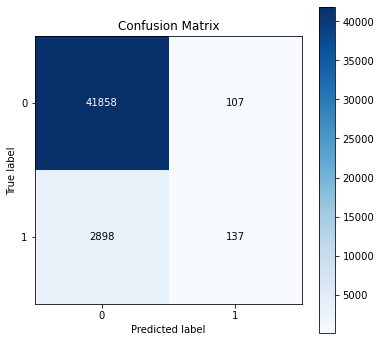

In [20]:
skplt.metrics.plot_confusion_matrix(y_test,y_predi,figsize=(6,6))

### calculating  ROC

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predi)
print(fpr)
print(fpr.shape)
print(tpr)
print(tpr.shape)
print(thresholds)

[0.         0.00254974 1.        ]
(3,)
[0.         0.04514003 1.        ]
(3,)
[2 1 0]


### calculating  AUC

In [22]:
from sklearn import metrics
# AUC
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.5212951445573908


### Plotting ROC

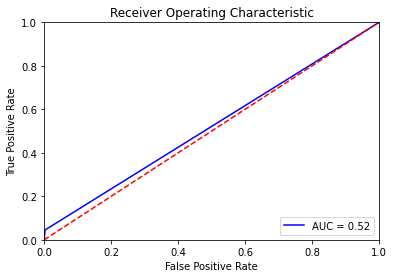

In [23]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Calculate F1 score

In [24]:
#calculate F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_predi) 

0.0835620616041476

### Accuracy score

In [25]:
accuracy_score(y_test, y_predi) 


0.9332222222222222

In [26]:
form = []
form.append(['Logistic Regression',accuracy_score(y_test, y_predi)])

### Precision

In [27]:
precision_score(y_test, y_predi)

0.5614754098360656

### Recall

In [28]:

recall_score(y_test, y_predi)

0.04514003294892916

### Cost-sensitive accuracy

In [29]:
fp_cost = 1
fn_cost = 0
cost_sensitive_accuracy = (tp + tn) / (tp + tn + fp*fp_cost + fn*fn_cost)
print(cost_sensitive_accuracy)

0.9974585530378605


In [30]:
results = pd.DataFrame([['Logistic Regression', accuracy_score(y_test, y_predi) ,precision_score(y_test, y_predi),recall_score(y_test, y_predi), f1_score(y_test, y_predi) ,roc_auc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression,0.933222,0.561475,0.04514,0.083562,0.521295


## Decision Tree

In [31]:

#specify the model, set any numeric valye as parameter to ensure reproducibility 
credit_model = DecisionTreeRegressor(random_state=1)

#fit the model
credit_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

### Make predictions

In [32]:
predictions_train = credit_model.predict(x_train)
y_pred = credit_model.predict(x_test)

In [33]:
#this section investigates resulting data
print(predictions_train)
print(y_pred)
print(y_pred.shape)
print(y_pred.dtype)
print(y_test.shape)
print(y_test.dtype)

[0. 0. 0. ... 1. 0. 1.]
[0. 0. 0. ... 0. 0. 0.]
(45000,)
float64
(45000,)
int64


In [34]:
#conver float to int
y_predi = y_pred.astype(int)

### create confusion matrics in text view

In [35]:
tn, fp, fn, tp = confusion_matrix( y_test,y_predi).ravel()
(tn, fp, fn, tp)

(39576, 2389, 2230, 805)

### Plotting Cunfusion Matrix

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

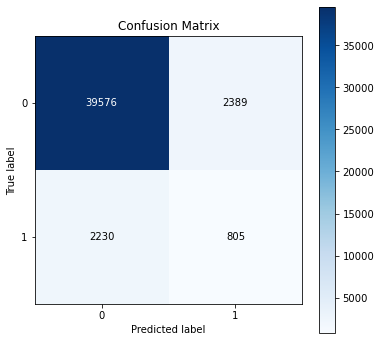

In [36]:
skplt.metrics.plot_confusion_matrix(y_test,y_predi,figsize=(6,6))

### ROC

In [37]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predi)
print(fpr)
print(fpr.shape)
print(tpr)
print(tpr.shape)
print(thresholds)

[0.         0.05692839 1.        ]
(3,)
[0.         0.26523888 1.        ]
(3,)
[2 1 0]


### AUC

In [38]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.6041552435140997

### Plotting 

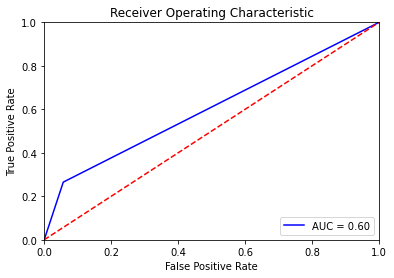

In [39]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### F1 score

In [40]:
f1_score=f1_score(y_test, y_predi)
f1_score

0.2584684540054583

### Accuracy score

In [41]:
a_score=accuracy_score(y_test, y_predi) 
a_score

0.8973555555555556

### Precision

In [42]:
p_score=precision_score(y_test, y_predi)
p_score

0.252035065748278

### Recall

In [43]:
recall_score=recall_score(y_test, y_predi)
recall_score

0.2652388797364086

### cost-sensitive accuracy

In [44]:
fp_cost = 1
fn_cost = 0
cost_sensitive_accuracy = (tp + tn) / (tp + tn + fp*fp_cost + fn*fn_cost)
print(cost_sensitive_accuracy)

0.9441430909516015


In [45]:
dt = pd.DataFrame([['Decision Tree', a_score ,p_score,recall_score, f1_score ,roc_auc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
dt

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Decision Tree,0.897356,0.252035,0.265239,0.258468,0.604155


In [46]:
results = results.append(dt, ignore_index = True)


## KNN

In [47]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
model_KNN.fit(x_train, y_train)
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(x_train, y_train)
knn_scores_proba = knn.predict_proba(x_train)
knn_scores = knn_scores_proba[:,1]
print("AUC Score :", roc_auc_score(y_train,knn_scores))

AUC Score : 0.8885851008352439


In [48]:
# from pandas import set_option
# from sklearn.model_selection import KFold
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesClassifier

In [49]:
scorelist = []
n_neighbors, maxauc = -1, 0
for k in range(100, 1000+1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test, y_pred)
    print(k, score)
    if score > maxauc:
        n_neighbors, maxauc = k, score
    scorelist.append(score)
print()
print(n_neighbors, maxauc)

100 0.7738350327634369
200 0.7751859427847517
300 0.7679619931177447
400 0.7659038529597605
500 0.7605512399424406
600 0.7545974826829686
700 0.7509684209658517
800 0.7484417959502222
900 0.746575817967079
1000 0.7444970911077345

200 0.7751859427847517


In [50]:
scorelist = []
n_neighbors, maxauc = -1, 0
for k in range(320, 400+1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test, y_pred)
    print(k, score)
    if score > maxauc:
        n_neighbors, maxauc = k, score
    scorelist.append(score)
print()
print(n_neighbors, maxauc)

320 0.7670612385664606
330 0.7665664236161341
340 0.766109193921113
350 0.7660452039836289
360 0.7663886925462126
370 0.7666982232585365
380 0.7665058569440172
390 0.7664008702631497
400 0.7659038529597605

320 0.7670612385664606


Text(0, 0.5, 'score(AUC)')

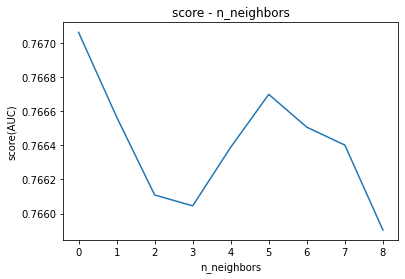

In [51]:
plt.plot(scorelist)
plt.title('score - n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('score(AUC)')

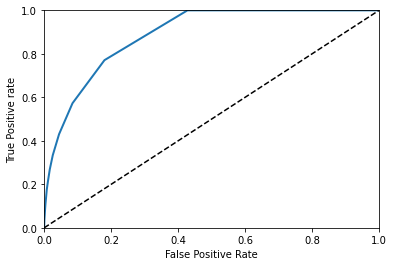

In [52]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--") 
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, knn_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

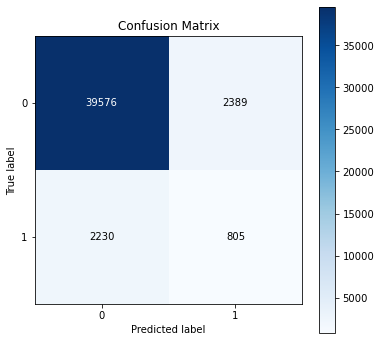

In [53]:
skplt.metrics.plot_confusion_matrix(y_test,y_predi,figsize=(6,6))

In [54]:
roc=roc_auc_score(y_test, y_pred)
roc

0.7659038529597605

In [51]:
acc=accuracy_score(y_test, y_pred.round(), normalize=True)
acc

0.9331333333333334

In [52]:
prec = precision_score(y_test, y_pred.round())
prec

0.6444444444444445

### Gaussian Naive Bayes

In [53]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_predi = gaussian.predict_proba(x_test)[:,1]
score = roc_auc_score(y_test, y_pred)
print(score)

form.append(['GaussianNB',score])

0.7659084657313275


In [54]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print(fpr)
print(fpr.shape)
print(tpr)
print(tpr.shape)
print(thresholds)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.38293816e-05
 9.53175265e-05 1.90635053e-04 3.09781961e-04 4.05099488e-04
 5.00417014e-04 6.67222686e-04 6.67222686e-04 6.91052067e-04
 6.91052067e-04 7.14881449e-04 7.14881449e-04 7.62540212e-04
 7.62540212e-04 7.62540212e-04 7.62540212e-04 8.10198975e-04
 8.10198975e-04 8.34028357e-04 8.34028357e-04 8.57857739e-04
 8.57857739e-04 8.57857739e-04 8.81687120e-04 8.81687120e-04
 9.05516502e-04 9.05516502e-04 9.05516502e-04 9.53175265e-04
 9.53175265e-04 9.77004647e-04 9.77004647e-04 1.00083403e-03
 1.02466341e-03 1.04849279e-03 1.07232217e-03 1.11998094e-03
 1.11998094e-03 1.16763970e-03 1.19146908e-03 1.23912784e-03
 1.28678661e-03 1.31061599e-03 1.33444537e-03 1.35827475e-03
 1.45359228e-03 1.54890981e-03 1.64422733e-03 1.66805671e-03
 1.71571548e-03 1.73954486e-03 1.83486239e-03 1.88252115e-03
 1.93017991e-03 1.95400929e-03 2.02549744e-03 2.02549744e-03
 2.12081496e-03 2.19230311e-03 2.31145002e-03 2.35910878e-03
 2.50208507e-03 2.549743

In [55]:
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.7659084657313275


In [1]:
skplt.metrics.plot_confusion_matrix(y_test,y_predi,figsize=(6,6))

NameError: name 'skplt' is not defined

In [58]:
acc = accuracy_score(fpr, y_pred)
acc

ValueError: Found input variables with inconsistent numbers of samples: [189, 45000]

In [ ]:
prec = precision_score(y_test, y_predi)
rec = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

### Random Forest

In [ ]:

grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'n_estimators':[30,50,80,100,200]
    },
    scoring='roc_auc',
    verbose=3
)
grid.fit(x_test, y_test)

for result in grid.cv_results_:
    print(result, grid.cv_results_[result])

In [ ]:
rfc = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'])
rfc.fit(x_train, y_train)

# 在子验证集上测试
y_pred = rfc.predict_proba(x_test)[:,1]
score = roc_auc_score(y_test, y_pred)
print(score)

In [ ]:
form.append(['Random FOresr',score])

In [ ]:
form